In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt

import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import fetch_openml #이미지 분류 데이터셋 (손글씨)


import warnings
warnings.simplefilter('ignore')



In [7]:
# 데이터 불러오기
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)



In [9]:
x_data = mnist['data']
y_data = mnist['target']

In [15]:
# (이미지개수, 28x28)
x_data.shape

(70000, 784)

In [16]:
# 해당 이미지에 대한 정답
y_data.shape

(70000,)

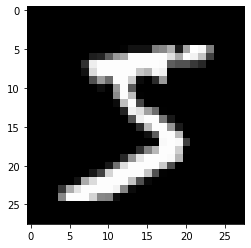

In [20]:
# 2차원 구조로 되어있어야 확인 가능
plt.imshow(x_data[0].reshape(28,28), 'gray')
plt.show()

## 학습 데이터 나누기

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                    test_size=0.2, stratify=y_data)


## 학습

In [23]:
model = MLPClassifier(verbose=1)
model.fit(x_train, y_train)

Iteration 1, loss = 3.87094882
Iteration 2, loss = 0.98062313
Iteration 3, loss = 0.52246059
Iteration 4, loss = 0.36243538
Iteration 5, loss = 0.27909110
Iteration 6, loss = 0.22751479
Iteration 7, loss = 0.18648635
Iteration 8, loss = 0.16605655
Iteration 9, loss = 0.15477975
Iteration 10, loss = 0.13481720
Iteration 11, loss = 0.12595708
Iteration 12, loss = 0.12039511
Iteration 13, loss = 0.10796064
Iteration 14, loss = 0.10633220
Iteration 15, loss = 0.10091132
Iteration 16, loss = 0.10011342
Iteration 17, loss = 0.09122250
Iteration 18, loss = 0.10042884
Iteration 19, loss = 0.09591234
Iteration 20, loss = 0.09640619
Iteration 21, loss = 0.09003116
Iteration 22, loss = 0.08184948
Iteration 23, loss = 0.08493923
Iteration 24, loss = 0.07801859
Iteration 25, loss = 0.07080916
Iteration 26, loss = 0.07358393
Iteration 27, loss = 0.07529803
Iteration 28, loss = 0.06415404
Iteration 29, loss = 0.06642270
Iteration 30, loss = 0.06399765
Iteration 31, loss = 0.06362782
Iteration 32, los

MLPClassifier(verbose=1)

In [24]:
model.score(x_test, y_test)

0.968

In [27]:
# 예측값
y_pred= model.predict(x_test)

In [26]:
import sklearn.metrics as m

In [28]:
cm=m.confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[1367,    0,    2,    0,    0,    1,    4,    3,    2,    1],
       [   0, 1555,    2,    5,    4,    0,    0,    3,    5,    1],
       [   7,    5, 1335,   22,    0,    2,    2,    9,   16,    0],
       [   1,    4,    9, 1376,    0,   14,    1,    5,   12,    6],
       [   0,    2,    4,    0, 1303,    0,    3,    7,    6,   40],
       [   3,    1,    3,   20,    3, 1199,    9,    4,   14,    7],
       [   5,    1,    0,    0,    3,    6, 1350,    1,    9,    0],
       [   4,    6,    5,    3,    5,    2,    0, 1417,    5,   12],
       [   9,    6,    4,    8,    3,    5,    2,    6, 1307,   15],
       [   7,    5,    0,    7,   11,    4,    0,   12,    3, 1343]],
      dtype=int64)

### 히트맵

In [31]:
import seaborn as sns

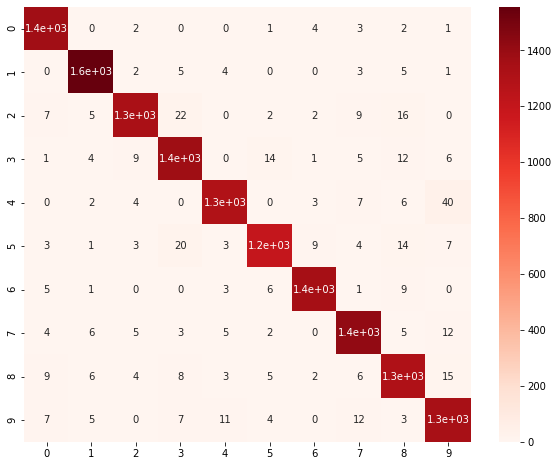

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Reds')
plt.show()

In [43]:
model.predict([x_test[0]])

array(['7'], dtype='<U1')